### Drive Set Up

In [ ]:
#Mount the RAW session level data: 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/content/drive/MyDrive/GroupBy/')

In [ ]:
df_ec = pd.read_csv('Copy of df_ec_final_ver_2.csv')
df_ec.shape

(25323266, 41)

In [ ]:
df_json = pd.read_csv('Copy of df_json_final_ver_2.csv')
df_json.shape

(1578809, 35)

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from time import strftime
from time import gmtime
import holidays

### Import Data

In [ ]:
#load the 'eCommerce Events History in Cosmetics Shop' data set
oct_2019_ec = pd.read_csv('2019-Oct.csv')
nov_2019_ec = pd.read_csv('2019-Nov.csv')
dec_2019_ec = pd.read_csv('2019-Dec.csv')
jan_2020_ec = pd.read_csv('2020-Jan.csv')
feb_2020_ec = pd.read_csv('2020-Feb.csv')

### merge all data sets from Commerce Events History in Cosmetics Shop' 
pdList = [oct_2019_ec, nov_2019_ec, nov_2019_ec, dec_2019_ec, jan_2020_ec, feb_2020_ec]

In [ ]:
#combine and create one dataframe
df_ec = pd.concat(pdList).sort_values(by=['event_time'], ascending=False)

### Explore Data

In [ ]:
#preview data
df_ec.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4156681,2020-02-29 23:59:59 UTC,view,5927709,1487580013950664926,NaN,de.lux,3.17,621669991,daa3c677-5360-4327-847e-d29658716b99
4156680,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d
4156679,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
4156678,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
4156677,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10


In [ ]:
#check data info
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25328677 entries, 4156681 to 0
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.9+ GB


In [ ]:
# create missing values dataframe
missing_values = df_ec.isnull().sum() / len(df_ec)
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

In [ ]:
missing_values

,count,Name
Name,,
event_time,0.000000,event_time
event_type,0.000000,event_type
product_id,0.000000,product_id
category_id,0.000000,category_id
price,0.000000,price
user_id,0.000000,user_id
user_session,0.000214,user_session
brand,0.424150,brand
category_code,0.983049,category_code


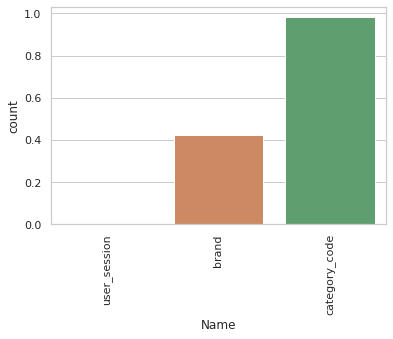

In [ ]:
#visualize missing values
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# check missing values to determine next teps
null_columns= df_ec.columns[df_ec.isnull().any()]
df_ec[null_columns].isnull().sum()

category_code    24899335
brand            10743146
user_session         5411
dtype: int64

In [ ]:
#check percentage of missing values
percent_missing = round(df_ec.isnull().sum() * 100 / len(df_ec),2)
percent_missing

event_time        0.00
event_type        0.00
product_id        0.00
category_id       0.00
category_code    98.30
brand            42.41
price             0.00
user_id           0.00
user_session      0.02
dtype: float64

In [ ]:
#check uniqueness of data values in relations to the category_code column
df_unique_category_code =df_ec.groupby('category_code')['category_id','product_id','brand'].nunique().add_prefix('num_').reset_index()
df_unique_category_code

,category_code,num_category_id,num_product_id,num_brand
0,accessories.bag,1,44,2
1,accessories.cosmetic_bag,1,21,3
2,apparel.glove,2,111,9
3,appliances.environment.air_conditioner,2,33,11
4,appliances.environment.vacuum,1,93,7
5,appliances.personal.hair_cutter,1,53,5
6,appliances.personal.massager,1,47,1
7,furniture.bathroom.bath,5,73,12
8,furniture.living_room.cabinet,1,6,3
9,furniture.living_room.chair,1,2,0


In [ ]:
#check uniqueness of data values in relations to the product_id column
df_unique_product_id = df_ec.groupby('product_id')['category_id','price','brand'].nunique().add_prefix('num_').reset_index()

#confirm that category_id and brand remains static product_id's
product_id_filter_non_unique = df_unique_product_id[(df_unique_product_id.num_category_id>1) & (df_unique_product_id.num_brand>1)]
product_id_filter_non_unique                                                                         

,product_id,num_category_id,num_price,num_brand
1778,37042,2,4,2
1783,37072,2,4,2
7417,5683272,2,2,2
36401,5861706,2,5,2


In [ ]:
#check uniqueness of data values in relations to the category_id column
df_unique_category_id = df_ec.groupby('category_id')['brand','price'].nunique().add_prefix('num_').reset_index()
df_unique_category_id.head()

,category_id,num_brand,num_price
0,1487580004807082827,1,3
1,1487580004832248652,1,23
2,1487580004857414477,2,37
3,1487580004882580302,0,15
4,1487580004916134735,0,59


### Update Data Types

In [ ]:
#update data types
df_ec['user_id'] = df_ec['user_id'].astype(str)
df_ec['product_id'] = df_ec['product_id'].astype(str)

In [ ]:
#convert event_time columns to date_time data type
df_ec['event_time'] = df_ec['event_time'].apply(lambda x : x[:-4])
df_ec['event_time'] = pd.to_datetime(df_ec['event_time'])

### Create Unique Keys for Data Pre-processing

In [ ]:
#create unique key for reference mapping dictionaries
df_ec['unique_key'] = df_ec['user_session'].map(str) + df_ec['event_type'] + df_ec['event_time'].map(str)

#create unique key for reference mapping dictionaries
df_ec['unique_sess_event'] = df_ec['event_type'] + df_ec['event_time'].map(str)

#create unique key for reference mapping dictionaries
df_ec['unique_sess'] = df_ec['user_id'].map(str) + df_ec['user_session'].map(str)


### Address Missing Values

##### Column: Use_Session

In [ ]:
# drop rows with missing values (ie: user_id)
df_ec = df_ec.dropna(subset=['user_session'])

##### Column: Brand

In [ ]:
# create dataframe without nan values and use it for later mapping
df_brand_nan = df_ec.dropna(subset=['brand'])
# replace missing values for brand
brand_dict = pd.Series(df_brand_nan.brand.values,index=df_brand_nan.product_id).to_dict()
# fill in missing values for brand
df_ec.brand = df_ec.brand.fillna(df_ec.product_id.map(brand_dict))

In [ ]:
# create dataframe without nan values for brand column
df_brand_nan = df_ec[df_ec['brand'].notnull()]

# create dataframe that's grouped by the category id column and selects the most common value for brand column
df_group_categ = df_brand_nan.groupby('category_id')['brand'].agg(pd.Series.mode).to_frame()
df_group_categ = df_group_categ.reset_index(drop=False)

# create a dictionary for reference mapping that uses the category_id column as key and the brand column as values
brand_dict = pd.Series(df_group_categ.brand.values,index=df_group_categ.category_id).to_dict()

# fill in missing values for brand using reference dictionary 
df_ec.brand = df_ec.brand.fillna(df_ec.category_id.map(brand_dict))

In [ ]:
# re-check missing values to determine next teps
null_columns= df_ec.columns[df_ec.isnull().any()]
df_ec[null_columns].isnull().sum()

category_code    24893983
brand             3398801
dtype: int64

In [ ]:
#fill the rest of the missing values with the value 'unknown'
df_ec.brand = df_ec.brand.fillna('unknown')

##### Column: Category Code

In [ ]:
# drop columns with significant amount of missing data
df_ec = df_ec.drop(['category_code'], axis = 1)

### Re-create the Total Sum and Revenue Features


In [ ]:
# re-create features from GroupBy dataset (total_event)
df_ec['totals_events'] = df_ec.groupby(['user_session'])['unique_sess_event'].nunique()

In [ ]:
#make copy 'event_type' before one hot coding (ie: copy is needed for later use)
df_ec['event_type_original'] = df_ec['event_type']

#one hot endoding 'event type'
categorical_columns = ['event_type']
df_ec_coded = pd.get_dummies(df_ec, columns=categorical_columns)

In [ ]:
# re-create features from GroupBy dataset (totalViewProducts)
df_ec_coded['totals. totalViewProducts'] = df_ec_coded.groupby(['user_session'])['event_type_view'].transform('sum')

In [ ]:
# re-create features from GroupBy dataset (totalViewProductRevenue)
df_viewed = df_ec_coded[df_ec_coded['event_type_view'] == 1] 
grouped_viewed = df_viewed.groupby(['user_session'])
df_viewed_price = grouped_viewed.agg({'price': 'sum'})
df_viewed_price = df_viewed_price.rename(columns={"price": "totals. totalViewProductRevenue"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_viewed_price['totals. totalViewProductRevenue'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (totalAddToCarts)
df_ec_coded['totals. totalAddToCarts'] = df_ec_coded.groupby(['user_session'])['event_type_cart'].transform('sum')

In [ ]:
# re-create features from GroupBy dataset (totalAddToCartRevenue)
df_cart = df_ec_coded[df_ec_coded['event_type_cart'] == 1]
grouped_cart = df_cart.groupby(['user_session'])
df_cart_price = grouped_cart.agg({'price': 'sum'})
df_cart_price = df_cart_price.rename(columns={"price": "totals. totalAddToCartRevenue"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_cart_price['totals. totalAddToCartRevenue'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (totalRemoveFromCarts)
df_ec_coded['totals. totalRemoveFromCarts'] = df_ec_coded.groupby(['user_session'])['event_type_remove_from_cart'].transform('sum')

In [ ]:
# re-create features from GroupBy dataset (totalRemoveFromCartsRevenue)
df_remove_cart = df_ec_coded[df_ec_coded['event_type_remove_from_cart'] == 1]
grouped_remove_cart = df_remove_cart.groupby(['user_session'])
df_remove_cart_price = grouped_remove_cart.agg({'price': 'sum'})
df_remove_cart_price = df_remove_cart_price.rename(columns={"price": "totals. totalRemoveFromCartRevenue"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_remove_cart_price['totals. totalRemoveFromCartRevenue'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (totalOrders)
df_ec_coded['totals. totalOrders'] = df_ec_coded.groupby(['user_session'])['event_type_purchase'].transform('sum')

In [ ]:
# re-create features from GroupBy dataset (totalOrderRevenue)
df_orders = df_ec_coded[df_ec_coded['event_type_purchase'] == 1]
grouped_orders = df_orders.groupby(['user_session'])
df_orders_price = grouped_orders.agg({'price': 'sum'})
df_orders_price = df_orders_price.rename(columns={"price": "totals. totalOrderRevenue"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_orders_price['totals. totalOrderRevenue'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (totalprice)
#df_ec_coded['totalprice'] = df_ec_coded.apply(lambda x: x['totalOrderRevenue'] if x['event_type_purchase'] == 1  < x['col2'] else x['col1'], axis=1)


### Re-create the Total Unqiue Features

In [ ]:
# re-create features from GroupBy dataset (uniqueViewProducts)
df_uniq_view = df_ec_coded[df_ec_coded['event_type_view'] == 1]
grouped_uniq_view = df_uniq_view.groupby(['user_session'])
df_uniq_view_prod = grouped_uniq_view.agg({'product_id': 'nunique'})
df_uniq_view_prod = df_uniq_view_prod.rename(columns={"product_id": "totals. uniqueViewProducts"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_uniq_view_prod['totals. uniqueViewProducts'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (uniqueAddToCarts)
df_uniq_cart = df_ec_coded[df_ec_coded['event_type_cart'] == 1]
grouped_uniq_cart = df_uniq_cart.groupby(['user_session'])
df_uniq_cart_prod = grouped_uniq_cart.agg({'product_id': 'nunique'})
df_uniq_cart_prod = df_uniq_cart_prod.rename(columns={"product_id": "totals. uniqueAddToCarts"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_uniq_cart_prod['totals. uniqueAddToCarts'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (uniqueRemoveFromCarts)
df_uniq_remove = df_ec_coded[df_ec_coded['event_type_remove_from_cart'] == 1]
grouped_uniq_remove = df_uniq_remove.groupby(['user_session'])
df_uniq_remove_prod = grouped_uniq_remove.agg({'product_id': 'nunique'})
df_uniq_remove_prod = df_uniq_remove_prod.rename(columns={"product_id": "totals. uniqueRemoveFromCarts"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_uniq_remove_prod['totals. uniqueRemoveFromCarts'],
                 on='user_session', 
                 how='left')

In [ ]:
# re-create features from GroupBy dataset (uniqueOrders)
df_uniq_order = df_ec_coded[df_ec_coded['event_type_purchase'] == 1]
grouped_uniq_order = df_uniq_order.groupby(['user_session'])
df_uniq_order_prod = grouped_uniq_order.agg({'product_id': 'nunique'})
df_uniq_order_prod = df_uniq_order_prod.rename(columns={"product_id": "totals. uniqueOrders"})
df_ec_coded = pd.merge(df_ec_coded,
                 df_uniq_order_prod['totals. uniqueOrders'],
                 on='user_session', 
                 how='left')

### Update or Drop Column Names




In [ ]:
#transition into final dataframe
df_ec_final = df_ec_coded

In [ ]:
#check columns and datat types
df_ec_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25323266 entries, 0 to 25323265
Data columns (total 28 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   event_time                          datetime64[ns]
 1   product_id                          object        
 2   category_id                         int64         
 3   brand                               object        
 4   price                               float64       
 5   user_id                             object        
 6   user_session                        object        
 7   unique_key                          object        
 8   unique_sess_event                   object        
 9   unique_sess                         object        
 10  totals_events                       float64       
 11  event_type_original                 object        
 12  event_type_cart                     uint8         
 13  event_type_purchase                 uint

In [ ]:
#rename columns
df_ec_final = df_ec_coded.rename(columns={
     'brand': 'product_brand',
     'price' : 'product_price',
     'user_session' : 'customerSessionId',
     'totals. totalViewProducts': 'totalViewProducts',
     'user_id':'customerVisitorId',
     'totals. totalViewProductRevenue':'totalViewProductRevenue',
     'totals. totalAddToCarts': 'totalAddToCarts',
     'totals. totalAddToCartRevenue': 'totalAddToCartRevenue',
     'totals. totalRemoveFromCarts':'totalRemoveFromCarts',
     'totals. totalRemoveFromCartRevenue':'totalRemoveFromCartRevenue',
     'totals. totalOrders': 'totalOrders',
     'totals. totalOrderRevenue':'totalOrderRevenue',
     'totals. uniqueViewProducts':'uniqueViewProducts',
     'totals. uniqueAddToCarts':'uniqueAddToCarts',
     'totals. uniqueRemoveFromCarts':'uniqueRemoveFromCarts',
     'totals. uniqueOrders':'uniqueOrders',
     'min': 'sessionStartTime',
     'max': 'sessionEndTime',
})

### Address Missing Values for New Featurees

In [ ]:
# check missing values to determine next teps
null_columns= df_ec_final.columns[df_ec_final.isnull().any()]
df_ec_final[null_columns].isnull().sum()

totals_events                 25323266
totalViewProductRevenue        2435933
totalAddToCartRevenue          7397549
totalRemoveFromCartRevenue    10907869
totalOrderRevenue             19945845
uniqueViewProducts             2435933
uniqueAddToCarts               7397549
uniqueRemoveFromCarts         10907869
uniqueOrders                  19945845
dtype: int64

In [ ]:
# columns with misisng values that can be filled in with 0
cols_fill_0 = ['totalViewProducts','totalViewProductRevenue','totalAddToCarts',
        'totalAddToCartRevenue', 'totalRemoveFromCarts', 'totalRemoveFromCartRevenue',
        'totalOrders','totalOrderRevenue','uniqueViewProducts', 'uniqueAddToCarts', 'uniqueRemoveFromCarts', 'uniqueOrders', 'totals_events']

# replace missing values with 0
df_ec_final[cols_fill_0] = df_ec_final[cols_fill_0].fillna(0)

In [ ]:
# re-check missing values to determine next teps
null_columns= df_ec_final.columns[df_ec_final.isnull().any()]
df_ec_final[null_columns].isnull().sum()

Series([], dtype: float64)

### Save to CSV

In [ ]:
#save to csv
df_ec_final.to_csv('df_ec_final_0.csv',index =False)